In [2]:
!pip install -r ../requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 37.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 121.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 131.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 99.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 26.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 141.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 153.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 170.8 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.8/292.8 kB 80.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [3]:
# Step 0. Import libraries and custom modules
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
# Machine learning -----------------------------------------------------
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
# Preprocessing --------------------------------------------------------
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
# Metrics --------------------------------------------------------------
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# Exporting ------------------------------------------------------------
import pickle

In [4]:
# Step 1. Read the dataset
# The data this week comes from Coffee Quality Database courtesy of Buzzfeed Data Scientist 
# James LeDoux. The original data can be found on James' github. The data was re-posted to Kaggle.
# These data were collected from the Coffee Quality Institute's review pages in January 2018.
# There is data for both Arabica and Robusta beans, across many countries and professionally 
# rated on a 0-100 scale. All sorts of scoring/ratings for things like acidity, sweetness, fragrance, 
# balance, etc - may be useful for either separating into visualizations/categories or for 
# modeling/recommenders.
# https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-07-07/readme.md
url = 'https://raw.githubusercontent.com/rfordatascience/' + \
'tidytuesday/master/data/2020/2020-07-07/coffee_ratings.csv'
df_raw = pd.read_csv(url)
df_raw.to_csv('../data/raw/coffee.csv') # con los .. salgo de la carpeta contenedora
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   total_cup_points       1339 non-null   float64
 1   species                1339 non-null   object 
 2   owner                  1332 non-null   object 
 3   country_of_origin      1338 non-null   object 
 4   farm_name              980 non-null    object 
 5   lot_number             276 non-null    object 
 6   mill                   1021 non-null   object 
 7   ico_number             1182 non-null   object 
 8   company                1130 non-null   object 
 9   altitude               1113 non-null   object 
 10  region                 1280 non-null   object 
 11  producer               1107 non-null   object 
 12  number_of_bags         1339 non-null   int64  
 13  bag_weight             1339 non-null   object 
 14  in_country_partner     1339 non-null   object 
 15  harv

In [5]:
# Get a sample
df_raw.sample(10)

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
1168,79.58,Arabica,carl walker,Guatemala,la igualdad,NaN,concepcion,11-194-0008,NaN,3500 - 5200 feet,...,NaN,19,"January 13th, 2012",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,ft,1066.8,1584.96,1325.88
1187,79.17,Arabica,juan luis alvarado romero,Guatemala,el chile,NaN,la conquista,11-973-94,mercon guatemala s.a.,1300 a 1800 metros sobre el nivel del mar,...,Green,6,"June 29th, 2016",Asociacion Nacional Del Café,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,m,1300.0,1800.00,1550.00
1005,81.00,Arabica,mayra yessenia torres,Honduras,el cerron,NaN,NaN,13-132-92,"olam honduras, s.a.",1350 snn,...,Green,1,"January 26th, 2016",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1350.0,1350.00,1350.00
955,81.33,Arabica,jacques pereira carneiro,Brazil,sertao farm,NaN,carapina,002/135-2/0076,exportadora de cafés carmo de minas ltda,1200,...,Green,6,"December 16th, 2015",Brazil Specialty Coffee Association,3297cfa4c538e3dd03f72cc4082c54f7999e1f9d,8900f0bf1d0b2bafe6807a73562c7677d57eb980,m,1200.0,1200.00,1200.00
269,83.92,Arabica,cqi taiwan icp cqi台灣合作夥伴,Taiwan,神谷山莊園,NaN,神谷山莊園,Taiwan台灣,宸嶧國際,950公尺,...,Green,0,"November 23rd, 2015",Blossom Valley International,fc45352eee499d8470cf94c9827922fb745bf815,de73fc9412358b523d3a641501e542f31d2668b0,m,950.0,950.00,950.00
1192,79.08,Arabica,juan luis alvarado romero,Guatemala,las merceditas,11/23/0693,beneficio ixchel,11/23/0693,"unex guatemala, s.a.",1700,...,Green,1,"August 23rd, 2018",Asociacion Nacional Del Café,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,m,1700.0,1700.00,1700.00
510,83.00,Arabica,juan luis alvarado romero,Guatemala,grupo medina (pequeños productores),NaN,beneficio siembras vision (154),11-11711-86 (SV),"siembras vision, s.a.",1500 msnm,...,Green,0,"March 7th, 2015",Asociacion Nacional Del Café,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,m,1500.0,1500.00,1500.00
62,85.58,Arabica,atlantic specialty coffee,El Salvador,el majahual,NaN,j. hill y cia,09 – 060-24,atlantic specialty coffee,1500 meters,...,Blue-Green,3,"March 18th, 2014",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1500.0,1500.00,1500.00
931,81.50,Arabica,juan luis alvarado romero,Guatemala,chiquimulja / alpha cafe / senfro,NaN,beneficio ixchel,11/23/0239,"unex guatemala, s.a.",NaN,...,Green,1,"January 24th, 2013",Asociacion Nacional Del Café,b1f20fe3a819fd6b2ee0eb8fdc3da256604f1e53,724f04ad10ed31dbb9d260f0dfd221ba48be8a95,m,NaN,NaN,NaN
452,83.17,Arabica,taylor winch (coffee) ltd.,Kenya,NaN,NaN,NaN,37-0843-3305,taylor winch (coffee) ltd,approx.1'500 metres a.s.l.,...,Bluish-Green,1,"July 2nd, 2016",Kenya Coffee Traders Association,ccba45b89d859740b749878be8c6d16fbdb96c2e,d752c909a015f3c76224b3c5cc520f8a67afda74,m,1.0,500.00,250.50


In [33]:
# Select metrics
df_interim = df_raw.copy()
df_interim = df_interim[['total_cup_points',
                            'species',
                            'country_of_origin',
                            'variety',
                            'aroma',
                            'aftertaste',
                            'acidity',
                            'body',
                            'balance',
                            'sweetness',
                            'altitude_mean_meters',
                            'moisture']]
df_interim = df_interim.dropna()

In [7]:
# Get a sample
df_interim.sample(10)

,total_cup_points,species,country_of_origin,variety,aroma,aftertaste,acidity,body,balance,sweetness,altitude_mean_meters,moisture
29,86.58,Arabica,Taiwan,Sumatra,8.00,8.00,8.25,8.00,8.17,10.00,1200.00,0.00
649,82.58,Arabica,Mexico,Typica,7.50,7.50,7.50,7.42,7.50,10.00,1250.00,0.10
316,83.67,Arabica,Honduras,Caturra,7.50,7.67,7.67,8.00,8.00,10.00,1400.00,0.10
1251,77.50,Arabica,Mexico,Typica,7.17,6.58,6.75,6.83,6.75,10.00,1300.00,0.13
472,83.17,Arabica,Brazil,Mundo Novo,7.92,7.50,7.58,7.42,7.50,10.00,950.00,0.11
131,84.67,Arabica,Ethiopia,Ethiopian Yirgacheffe,8.08,7.75,7.83,7.58,7.67,10.00,1900.00,0.10
1212,78.67,Arabica,China,Typica,7.00,6.83,7.17,7.17,7.17,9.33,1850.00,0.00
1110,80.17,Arabica,Mexico,Typica,7.58,7.33,7.50,7.08,7.17,10.00,1550.00,0.14
288,83.83,Arabica,Guatemala,Bourbon,7.50,7.50,7.83,7.83,7.67,10.00,1310.64,0.11
49,86.00,Arabica,Uganda,Other,8.25,7.83,8.08,8.00,7.92,10.00,1650.00,0.10


In [34]:
# Transform

df_interim.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 997 entries, 1 to 1333
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_cup_points      997 non-null    float64
 1   species               997 non-null    object 
 2   country_of_origin     997 non-null    object 
 3   variety               997 non-null    object 
 4   aroma                 997 non-null    float64
 5   aftertaste            997 non-null    float64
 6   acidity               997 non-null    float64
 7   body                  997 non-null    float64
 8   balance               997 non-null    float64
 9   sweetness             997 non-null    float64
 10  altitude_mean_meters  997 non-null    float64
 11  moisture              997 non-null    float64
dtypes: float64(9), object(3)
memory usage: 101.3+ KB


In [35]:
for var in ['species', 'country_of_origin', 'variety']:
    df_interim[var]=pd.Categorical(df_interim[var])

In [36]:
df_interim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997 entries, 1 to 1333
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   total_cup_points      997 non-null    float64 
 1   species               997 non-null    category
 2   country_of_origin     997 non-null    category
 3   variety               997 non-null    category
 4   aroma                 997 non-null    float64 
 5   aftertaste            997 non-null    float64 
 6   acidity               997 non-null    float64 
 7   body                  997 non-null    float64 
 8   balance               997 non-null    float64 
 9   sweetness             997 non-null    float64 
 10  altitude_mean_meters  997 non-null    float64 
 11  moisture              997 non-null    float64 
dtypes: category(3), float64(9)
memory usage: 83.5 KB


In [37]:
# We'll divide our cup point into two classes: specialty or not
# All coffees with over 80 points are considered specialty, we'll use the median as separator
# https://nobletreecoffee.com/coffee-cupping/
df_interim['specialty'] = df_interim['total_cup_points'].apply(lambda x: 'Yes' if x>82.43 else 'No')

In [38]:
# Save to final dataset
df_interim.to_csv('../data/interim/coffee.csv')
df = df_interim.copy()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997 entries, 1 to 1333
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   total_cup_points      997 non-null    float64 
 1   species               997 non-null    category
 2   country_of_origin     997 non-null    category
 3   variety               997 non-null    category
 4   aroma                 997 non-null    float64 
 5   aftertaste            997 non-null    float64 
 6   acidity               997 non-null    float64 
 7   body                  997 non-null    float64 
 8   balance               997 non-null    float64 
 9   sweetness             997 non-null    float64 
 10  altitude_mean_meters  997 non-null    float64 
 11  moisture              997 non-null    float64 
 12  specialty             997 non-null    object  
dtypes: category(3), float64(9), object(1)
memory usage: 91.3+ KB


In [42]:
# Proceed to train test split
X = df.drop(['total_cup_points', 'specialty'], axis=1)
y = df['specialty']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=121, stratify=y)

df_train = pd.concat([X_train, y_train], axis=1)

In [40]:
# Sample
X_train.sample(10)

,species,country_of_origin,variety,aroma,aftertaste,acidity,body,balance,sweetness,altitude_mean_meters,moisture
926,Arabica,Mexico,Typica,7.33,7.33,7.33,7.33,7.42,10.0,1000.0,0.11
377,Arabica,Colombia,Caturra,7.67,7.50,7.67,7.67,7.58,10.0,442.0,0.11
1032,Arabica,Mexico,Catuai,7.17,7.25,7.42,7.25,7.33,10.0,1210.0,0.13
1261,Arabica,Mexico,Typica,6.67,6.42,6.83,7.00,6.92,10.0,1200.0,0.00
1161,Arabica,Mexico,Typica,7.42,6.83,7.58,7.17,6.58,10.0,1400.0,0.12
194,Arabica,Guatemala,Caturra,7.75,7.58,7.92,7.75,7.75,10.0,1500.0,0.11
304,Arabica,Colombia,Caturra,7.67,7.67,7.92,7.50,7.67,10.0,1775.0,0.00
246,Arabica,Guatemala,Bourbon,7.75,7.50,7.83,7.58,7.67,10.0,1219.2,0.10
831,Arabica,Brazil,Mundo Novo,7.42,7.25,7.50,7.33,7.50,10.0,1100.0,0.12
434,Arabica,Brazil,Yellow Bourbon,7.75,7.50,7.58,7.58,7.58,10.0,1200.0,0.11


In [43]:
# Get basic statistics
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
aroma,747.0,7.555890,0.402719,0.0,7.42,7.58,7.75,8.75
aftertaste,747.0,7.366519,0.431771,0.0,7.17,7.42,7.58,8.58
acidity,747.0,7.501339,0.412465,0.0,7.33,7.50,7.67,8.58
body,747.0,7.490803,0.385580,0.0,7.33,7.50,7.67,8.42
balance,747.0,7.489451,0.441660,0.0,7.33,7.50,7.67,8.58
sweetness,747.0,9.905181,0.586544,0.0,10.00,10.00,10.00,10.00
altitude_mean_meters,747.0,2002.317401,10550.731365,1.0,1100.00,1310.64,1600.00,190164.00
moisture,747.0,0.092838,0.045308,0.0,0.10,0.11,0.12,0.17


- sweetness: por lo menos el 75% de los datos vale 10, no hay variabilidad --> varianza insignificante
- puede ser problemático para el dataset, si todos valen lo mismo no va a tener poder predictivo
- la altura está rara

In [44]:
X_train.describe(include='category')

,species,country_of_origin,variety
count,747,747,747
unique,2,30,27
top,Arabica,Mexico,Caturra
freq,744,170,179


- species no tiene poder predictivo

In [52]:
# Analyze
X_train.sort_values(by='altitude_mean_meters').head(20)

,species,country_of_origin,variety,aroma,aftertaste,acidity,body,balance,sweetness,altitude_mean_meters,moisture
877,Arabica,Brazil,Yellow Bourbon,7.25,6.92,7.42,7.50,7.58,10.0,1.0000,0.00
683,Arabica,Brazil,Yellow Bourbon,7.17,7.33,7.50,7.75,7.42,10.0,1.0000,0.00
838,Arabica,Brazil,Yellow Bourbon,7.17,6.83,7.50,7.75,7.25,10.0,1.0000,0.00
963,Arabica,Brazil,Yellow Bourbon,7.17,7.17,7.08,6.92,8.17,10.0,1.0000,0.00
780,Arabica,Brazil,Yellow Bourbon,7.25,7.58,7.58,7.25,7.92,10.0,1.0000,0.00
839,Arabica,Brazil,Yellow Bourbon,7.58,6.92,6.92,7.67,7.50,10.0,1.0000,0.00
1203,Arabica,Mexico,Typica,7.17,6.83,7.25,7.17,6.92,10.0,12.0000,0.14
785,Arabica,Costa Rica,Caturra,7.58,7.33,7.33,7.50,7.67,10.0,13.0000,0.11
1068,Arabica,Taiwan,Other,7.17,7.17,7.42,7.17,7.25,10.0,50.0000,0.00
938,Arabica,Taiwan,Typica,7.83,7.42,7.17,7.08,7.08,10.0,110.0000,0.12


In [53]:
# Analyze
X_train.sort_values(by='altitude_mean_meters', ascending=False).head(20)

,species,country_of_origin,variety,aroma,aftertaste,acidity,body,balance,sweetness,altitude_mean_meters,moisture
1144,Arabica,Guatemala,Bourbon,7.50,7.25,7.58,7.33,7.42,9.33,190164.0,0.10
896,Arabica,Guatemala,Bourbon,7.42,7.08,7.50,7.42,7.33,10.00,190164.0,0.12
1040,Arabica,Nicaragua,Other,7.25,7.17,7.25,7.33,7.25,10.00,110000.0,0.12
543,Arabica,Brazil,Moka Peaberry,7.08,7.50,7.83,7.75,7.67,10.00,11000.0,0.11
1098,Arabica,Myanmar,Catuai,7.42,7.08,7.00,7.17,7.33,10.00,4287.0,0.00
840,Arabica,Myanmar,Catuai,7.33,7.50,7.42,7.33,7.33,10.00,4001.0,0.00
1123,Arabica,Myanmar,Other,7.17,7.00,7.42,7.17,7.00,10.00,3845.0,0.00
1073,Arabica,Myanmar,Other,7.17,7.17,7.42,7.25,7.08,10.00,3800.0,0.00
1269,Arabica,Indonesia,Other,7.33,6.50,6.08,7.58,6.33,9.33,3500.0,0.12
1001,Arabica,Guatemala,Bourbon,7.42,7.17,7.50,7.25,7.17,10.00,3280.0,0.09


- Son 4 observaciones las que tienen un valor muy alto de altura
- columna species no es de mucha utilidad

In [45]:
# Count values
X_train['species'].value_counts()

Arabica    744
Robusta      3
Name: species, dtype: int64

In [46]:
# Count countries
X_train['country_of_origin'].value_counts()

Mexico                          170
Guatemala                       110
Colombia                         97
Brazil                           76
Taiwan                           48
Honduras                         38
Costa Rica                       36
Tanzania, United Republic Of     31
Uganda                           16
El Salvador                      15
Kenya                            13
China                            12
Indonesia                        12
Ethiopia                         11
Nicaragua                        10
Malawi                            8
United States                     7
Myanmar                           6
Thailand                          6
Vietnam                           6
Panama                            3
Haiti                             3
Laos                              2
Peru                              2
Philippines                       2
India                             2
United States (Puerto Rico)       2
Burundi                     

In [47]:
# Get %
X_train['country_of_origin'].value_counts(normalize=True)

Mexico                          0.227577
Guatemala                       0.147256
Colombia                        0.129853
Brazil                          0.101740
Taiwan                          0.064257
Honduras                        0.050870
Costa Rica                      0.048193
Tanzania, United Republic Of    0.041499
Uganda                          0.021419
El Salvador                     0.020080
Kenya                           0.017403
China                           0.016064
Indonesia                       0.016064
Ethiopia                        0.014726
Nicaragua                       0.013387
Malawi                          0.010710
United States                   0.009371
Myanmar                         0.008032
Thailand                        0.008032
Vietnam                         0.008032
Panama                          0.004016
Haiti                           0.004016
Laos                            0.002677
Peru                            0.002677
Philippines     

In [48]:
# Count variety
X_train['variety'].value_counts()

Caturra                  179
Bourbon                  161
Typica                   147
Other                     81
Catuai                    51
Mundo Novo                23
Yellow Bourbon            22
Catimor                   13
SL14                      12
Pacas                     10
Gesha                      9
SL28                       8
Pacamara                   7
SL34                       5
Ethiopian Yirgacheffe      2
Sumatra                    2
Ruiru 11                   2
Arusha                     2
Blue Mountain              2
Mandheling                 2
Peaberry                   1
Ethiopian Heirlooms        1
Moka Peaberry              1
Marigojipe                 1
Sulawesi                   1
Java                       1
Pache Comun                1
Sumatra Lintong            0
Name: variety, dtype: int64

In [50]:
# Get % variety
X_train['variety'].value_counts(normalize=True)

Caturra                  0.239625
Bourbon                  0.215529
Typica                   0.196787
Other                    0.108434
Catuai                   0.068273
Mundo Novo               0.030790
Yellow Bourbon           0.029451
Catimor                  0.017403
SL14                     0.016064
Pacas                    0.013387
Gesha                    0.012048
SL28                     0.010710
Pacamara                 0.009371
SL34                     0.006693
Ethiopian Yirgacheffe    0.002677
Sumatra                  0.002677
Ruiru 11                 0.002677
Arusha                   0.002677
Blue Mountain            0.002677
Mandheling               0.002677
Peaberry                 0.001339
Ethiopian Heirlooms      0.001339
Moka Peaberry            0.001339
Marigojipe               0.001339
Sulawesi                 0.001339
Java                     0.001339
Pache Comun              0.001339
Sumatra Lintong          0.000000
Name: variety, dtype: float64

In [54]:
# Given the excess of categories in country and variety, we'll aggregate 
# low values into others (using Pareto's rule: or a minimum of 50 observations)
# regla de pareto: dejo los países que suman 80% y el resto los agrupo en otros

top_varieties = ['Caturra', 'Typica', 'Bourbon', 'Catuai']
df_interim['variety'] = df_interim['variety'].apply(lambda x: x if x in top_varieties else 'Other')

In [55]:
top_countries = ['Mexico', 'Guatemala', 'Colombia', 'Brazil', 'Taiwan']
df_interim['country_of_origin'] = df_interim['country_of_origin'].apply(lambda x: x if x in top_countries else 'Other')

In [56]:
for var in ['species', 'country_of_origin', 'variety']:
    df_interim[var]=pd.Categorical(df_interim[var])

In [58]:
df_interim['specialty'] = df_interim['total_cup_points'].apply(lambda x: 'Yes' if x>82.43 else 'No')
df_interim['specialty'] = pd.Categorical(df_interim['specialty'])

In [59]:
df_interim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997 entries, 1 to 1333
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   total_cup_points      997 non-null    float64 
 1   species               997 non-null    category
 2   country_of_origin     997 non-null    category
 3   variety               997 non-null    category
 4   aroma                 997 non-null    float64 
 5   aftertaste            997 non-null    float64 
 6   acidity               997 non-null    float64 
 7   body                  997 non-null    float64 
 8   balance               997 non-null    float64 
 9   sweetness             997 non-null    float64 
 10  altitude_mean_meters  997 non-null    float64 
 11  moisture              997 non-null    float64 
 12  specialty             997 non-null    category
dtypes: category(4), float64(9)
memory usage: 82.4 KB


In [61]:
# Second interation after cleaning up variables
df_interim.to_csv('../data/interim/coffee.csv')
df = df_interim.copy()

In [73]:
# Again, train and test

X = df.drop(['total_cup_points', 'specialty', 'altitude_mean_meters', 'sweetness', 'species'], axis=1)
y = df['specialty']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=121, stratify=y)

df_train = pd.concat([X_train, y_train], axis=1)


In [63]:
# Get info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 747 entries, 764 to 966
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   species               747 non-null    category
 1   country_of_origin     747 non-null    category
 2   variety               747 non-null    category
 3   aroma                 747 non-null    float64 
 4   aftertaste            747 non-null    float64 
 5   acidity               747 non-null    float64 
 6   body                  747 non-null    float64 
 7   balance               747 non-null    float64 
 8   sweetness             747 non-null    float64 
 9   altitude_mean_meters  747 non-null    float64 
 10  moisture              747 non-null    float64 
 11  specialty             747 non-null    category
dtypes: category(4), float64(8)
memory usage: 56.1 KB


In [67]:
# Get stats
X_train.describe()

,aroma,aftertaste,acidity,body,balance,moisture
count,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000
mean,7.555890,7.366519,7.501339,7.490803,7.489451,0.092838
std,0.402719,0.431771,0.412465,0.385580,0.441660,0.045308
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.420000,7.170000,7.330000,7.330000,7.330000,0.100000
50%,7.580000,7.420000,7.500000,7.500000,7.500000,0.110000
75%,7.750000,7.580000,7.670000,7.670000,7.670000,0.120000
max,8.750000,8.580000,8.580000,8.420000,8.580000,0.170000


In [68]:
# Describe categories
X_train.describe(include='category')

,country_of_origin,variety
count,747,747
unique,6,5
top,Other,Other
freq,246,209


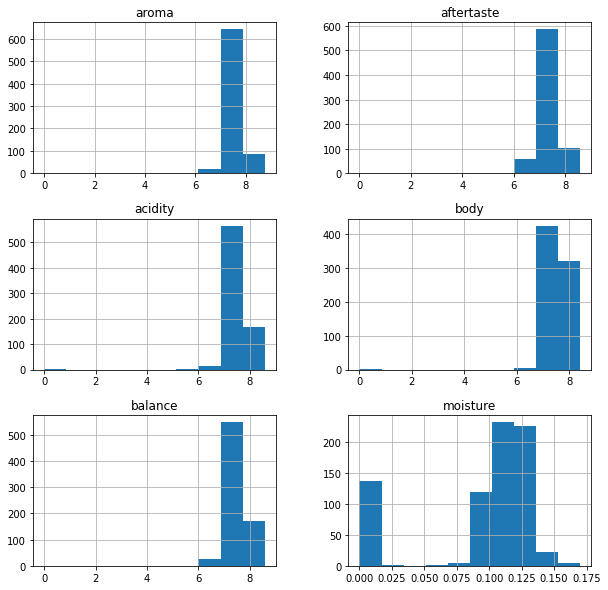

In [74]:
# Plot histograms
X_train.hist(figsize=(10,10))
plt.show()

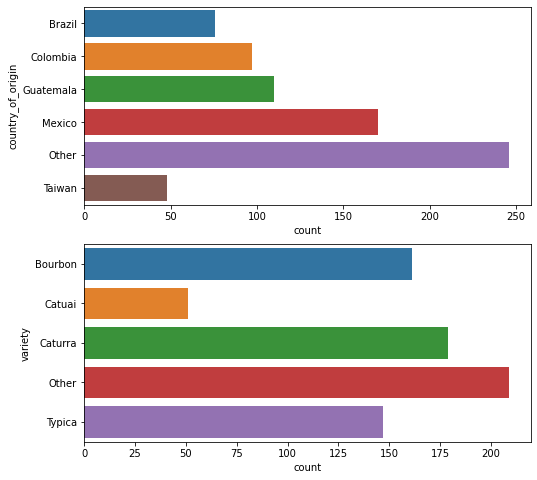

In [70]:
# Plot categories countplot

cats = X_train.select_dtypes('category')
fig, ax = plt.subplots(2,1, figsize=(8,8))
axs = ax.flatten()
for i in range(len(axs)):
    sns.countplot(data=cats, y=cats.columns.to_list()[i], ax=axs[i])


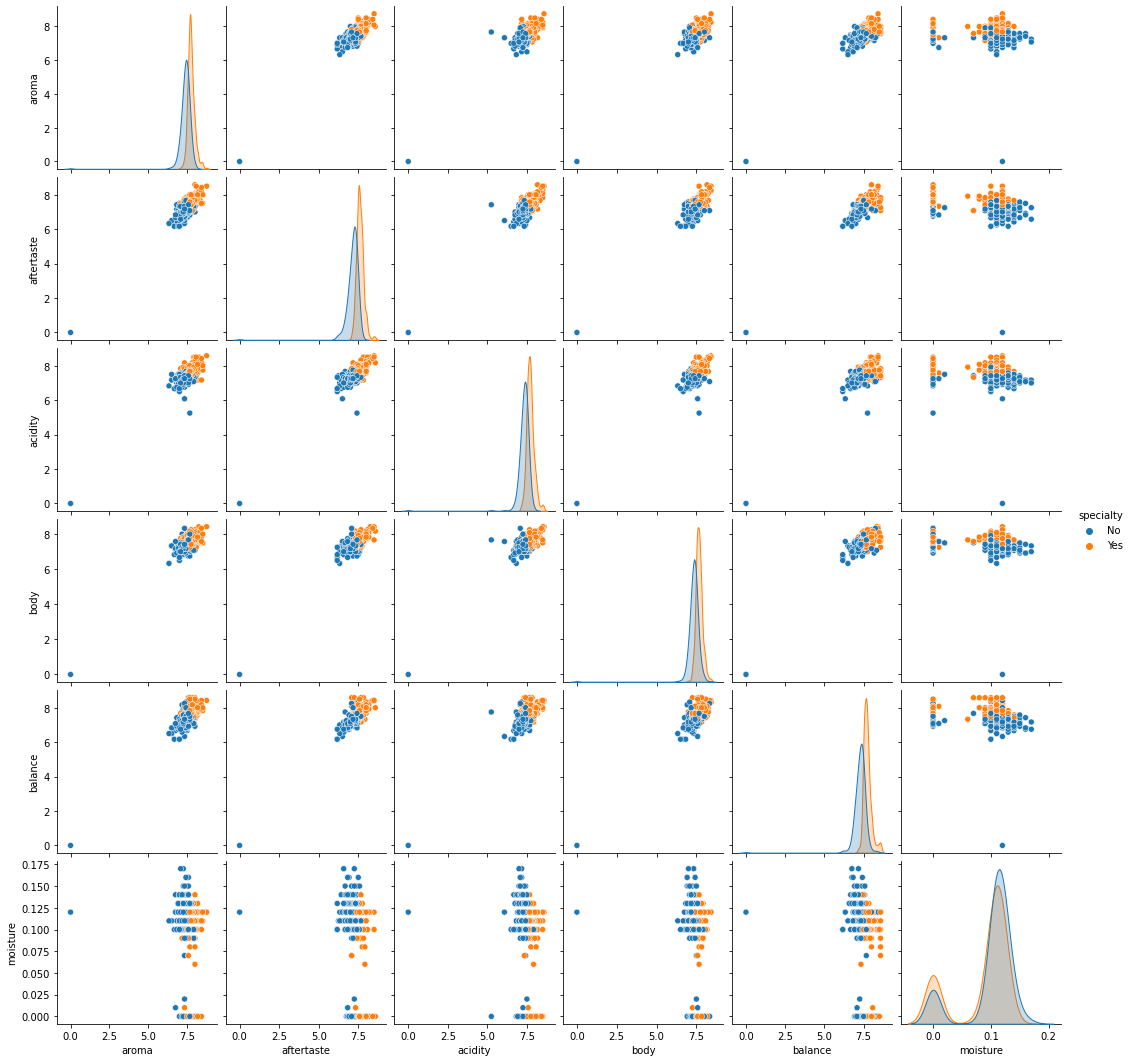

In [71]:
# Plot pairplot
sns.pairplot(data=df_train, hue='specialty')
plt.show()

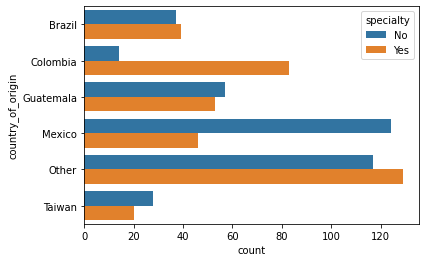

In [77]:
# Plot category effect

sns.countplot(data=df_train, y='country_of_origin', hue='specialty')
plt.show()


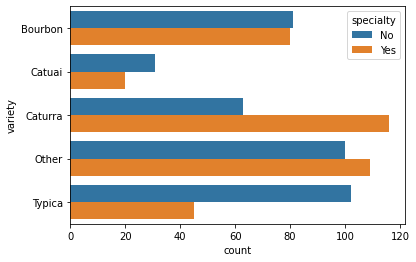

In [80]:
# Plot category effect

sns.countplot(data=df_train, y='variety', hue='specialty')
plt.show()

In [72]:
# Calculate correlation
X_train.corr().style.background_gradient(cmap='Blues')

# hay correlaciones muy altas entre algunas variables
# esto lo vemos en el pairplot, que los puntos siguen una misma tendencia

,aroma,aftertaste,acidity,body,balance,moisture
aroma,1.000000,0.836781,0.788699,0.775962,0.791976,-0.101566
aftertaste,0.836781,1.000000,0.817153,0.814641,0.854894,-0.149135
acidity,0.788699,0.817153,1.000000,0.783382,0.776394,-0.112160
body,0.775962,0.814641,0.783382,1.000000,0.817846,-0.183112
balance,0.791976,0.854894,0.776394,0.817846,1.000000,-0.207861
moisture,-0.101566,-0.149135,-0.112160,-0.183112,-0.207861,1.000000


In [81]:
# 3.1 Create your pipeline processing
# https://stackoverflow.com/questions/61641852/
# https://jaketae.github.io/study/sklearn-pipeline/
cat_cols = X_train.select_dtypes(include='category').columns
num_cols = X_train.select_dtypes(include='number').columns

cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse=False))
])

num_transformer = Pipeline(steps = [
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(transformers = [
    ('num', num_transformer, num_cols),
    ('cat', cat_transformer, cat_cols)
])

encode_data = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

In [83]:
# 3.2 Perform model fit

# las var están muy correlacionadas --> hacemos random forest

rforest = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', RandomForestClassifier())])

rforest.fit(X_train, y_train)

print(f'Accuracy:{rforest.score(X_train, y_train):.2f}')

Accuracy:1.00


              precision    recall  f1-score   support

          No       0.93      0.89      0.91       126
         Yes       0.89      0.94      0.91       124

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250



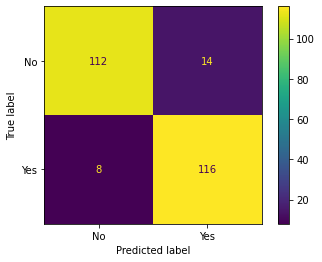

In [87]:
# 3.4 Calculate metrics on model

y_pred = rforest.predict(X_test)
print(classification_report(y_test,y_pred))


cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=rforest.classes_).plot() # para que lo muestre pintado
plt.show()

In [88]:
# Get variable importance
names = []
names.extend(num_cols) # primero ponemos las numéricas que son las que están primero en el procesador
cats_names = rforest.named_steps['preprocessor'].transformers_[1][1].named_steps['onehot'].get_feature_names().tolist() 
# para sacar los nombres de las categóricas
names.extend(cats_names)


# importancia de las variables
imp = rforest.named_steps['classifier'].feature_importances_

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


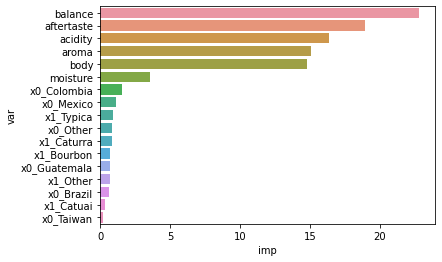

In [91]:
# Plot variable importance
var_imp = pd.DataFrame({'var': names, 'imp': imp*100}).sort_values(by='imp', ascending=False)

sns.barplot(data=var_imp, x='imp', y='var')
plt.show()

In [92]:
# Save the model as a pickle
filename = '../models/coffee_model.pkl'
pickle.dump(rforest, open(filename,'wb'))

In [93]:
X_train.sample(2)

,country_of_origin,variety,aroma,aftertaste,acidity,body,balance,moisture
1184,Guatemala,Bourbon,7.33,7.33,7.42,7.50,7.42,0.10
724,Mexico,Typica,7.67,7.42,7.50,7.42,7.42,0.12


In [94]:
# Create a set for testing

example = ['Other', 'Other', 7.42, 7.33, 7.42, 7.25, 7.33, 0]

# tenemos que hacer df para que pase por el pipeline

example_df = pd.DataFrame(np.array(example).reshape(1,8), columns=X_train.columns) #reshape porque el array viene como columna y nosotros queremos fila

In [95]:
example_df

,country_of_origin,variety,aroma,aftertaste,acidity,body,balance,moisture
0,Other,Other,7.42,7.33,7.42,7.25,7.33,0


In [96]:
# Predcit based on the set
rforest.predict(example_df)

# el dato que le pase a la API tiene que entrar en data frame porque hicimos un Pipeline

array(['No'], dtype=object)